Notebook from Sebastian Raschka, with added comments.

Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2020/  
GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss20

For pytorch tutorials : https://pytorch.org/tutorials/


# Solving the XOR Problem

## Toy Dataset

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_SEED = 123

In [2]:
# load toy dataset for the XOR problem
df = pd.read_csv('xor.csv')
df.head()

,x1,x2,class label
0,0.781306,1.062984,0
1,-1.060524,-1.095550,0
2,0.632125,0.674028,0
3,-1.424712,0.535203,1
4,1.383161,1.368510,0


In [3]:
X = df[['x1', 'x2']].values
print(X[:5])
y = df['class label'].values
print(y[:5])

[[ 0.78130599  1.06298377]
 [-1.06052385 -1.09555   ]
 [ 0.63212536  0.67402816]
 [-1.42471211  0.53520293]
 [ 1.38316069  1.36850977]]
[0 0 0 1 0]


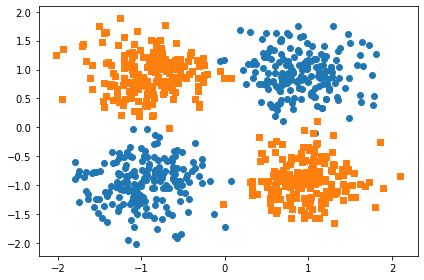

In [4]:
# Visualize datapoints to classify 
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o') # select rows for which y==0
plt.scatter(X[y==1, 0], X[y==1, 1], marker='s')
plt.tight_layout()
#plt.savefig('xor.pdf')
plt.show()

## Multilayer Perceptron with **Linear** Activations

We use classes in pytorch to describe our model and how it will operate on the data we feed it.
We define our neural network by subclassing nn.Module (inheriting from all the functionalities already coded by the pytorch developers), and initialize the neural network layers/modules with __init__. Every the operations on input data are to be defined in the `forward`method.

In [6]:
class MLPLinear(nn.Module): # subclass nn.Module

    def __init__(self, num_features, num_hidden_1, num_classes):
        super().__init__() # inherit the init function from nn.Module
        
        self.num_classes = num_classes
        
        #The linear layer is a module that applies a linear transformation. 
        # You can see it as a matrix of weights + a bias vector to be applied to an input vector / matrix of vectors
        # y = x@W.T + b (see doc: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
        self.hidden = nn.Linear(num_features, num_hidden_1) # hidden layer (in, out)
        
        self.out = nn.Linear(num_hidden_1, num_classes) # output layer (in, out)
        
        
        
    def forward(self, x):
        # this is the function that operates on the data. It must have the same name in every neural net you create with pytorch.
        
        hidden_out = self.hidden(x)
        
        # out = F.relu(out) 
        # as an experiment, we do  not add the activation function or NON-LINEARITY here
                
        logits = self.out(hidden_out) # scores output by the output layer : 1 score or "logit" per class.
        
        # softmax function applied to logits, to turn the scores into probabilities. 
        # dim is the dimension along which to apply the function.  
        # The crossentropy loss function computes softmax automatically on the logits
        # so we return both the logits to feed to the loss function and the probability estimations
        probas = F.softmax(logits, dim=1) 
        
        return logits, probas

In [7]:
torch.manual_seed(RANDOM_SEED)

# initialize the model
model1 = MLPLinear(num_features=2,
                   num_hidden_1=50,
                   num_classes=2)
print(model1)


# Optimization is the process of adjusting model parameters to reduce model error in each training step. 
# Optimization algorithms define how this process is performed (Stochastic Gradient Descent in this case).
# We initialize the optimizer by registering the model’s parameters that need to be trained, 
# and passing in the learning rate hyperparameter.
optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)

MLPLinear(
  (hidden): Linear(in_features=2, out_features=50, bias=True)
  (out): Linear(in_features=50, out_features=2, bias=True)
)


In [8]:
# weights in the layers and their shapes
for name, param in model1.named_parameters():
    print(f"{name} : {param.shape}")

hidden.weight : torch.Size([50, 2])
hidden.bias : torch.Size([50])
out.weight : torch.Size([2, 50])
out.bias : torch.Size([2])


In [10]:
start_time = time.time()
costs = []

# number of passes over the data
NUM_EPOCHS = 25

# turn the list of features and the list of labels into torch tensors (equivalent of numpy arrays but for pytorch)
features = torch.tensor(X, dtype=torch.float)
targets = torch.tensor(y, dtype=torch.long)

for epoch in range(NUM_EPOCHS):

    ### FORWARD PASS AND BACK PROP
    # pass in the matrix of examples to the model.  This returns the output of the `forward` method : Forward pass
    logits, probas = model1(features)
        
    # compute the cost
    # Cross-entropy computes the loss between given the predictions and the targets.  
    # As you can see we pass in the logits (raw output scores), not the probas.  The loss function takes care of transforming
    # the outputs into probas for us.
    loss = F.cross_entropy(logits, targets)
    #print(f'{cost=}')
    costs.append(loss.item())
    
    
    # Inside the training loop, optimization happens in three steps:

    # Call optimizer.zero_grad() to reset the gradients of model parameters. 
    # Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
    optimizer.zero_grad()

    # Backpropagate the prediction loss with a call to loss.backward(). 
    # PyTorch computes the gradients of the loss w.r.t. each parameter.
    loss.backward()


    # Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.
    optimizer.step()
    

    ### LOGGING

    print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | Cost: {loss:.4f}')
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/025 | Cost: 0.6927
Epoch: 002/025 | Cost: 0.6927
Epoch: 003/025 | Cost: 0.6927
Epoch: 004/025 | Cost: 0.6927
Epoch: 005/025 | Cost: 0.6927
Epoch: 006/025 | Cost: 0.6927
Epoch: 007/025 | Cost: 0.6927
Epoch: 008/025 | Cost: 0.6927
Epoch: 009/025 | Cost: 0.6927
Epoch: 010/025 | Cost: 0.6927
Epoch: 011/025 | Cost: 0.6927
Epoch: 012/025 | Cost: 0.6927
Epoch: 013/025 | Cost: 0.6927
Epoch: 014/025 | Cost: 0.6927
Epoch: 015/025 | Cost: 0.6927
Epoch: 016/025 | Cost: 0.6927
Epoch: 017/025 | Cost: 0.6927
Epoch: 018/025 | Cost: 0.6927
Epoch: 019/025 | Cost: 0.6927
Epoch: 020/025 | Cost: 0.6927
Epoch: 021/025 | Cost: 0.6927
Epoch: 022/025 | Cost: 0.6927
Epoch: 023/025 | Cost: 0.6927
Epoch: 024/025 | Cost: 0.6927
Epoch: 025/025 | Cost: 0.6927
Total Training Time: 0.00 min


In [11]:
from matplotlib.colors import ListedColormap
import numpy as np

# function to observe decision boundary;, no need to look at this in detail
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    logits, probas = classifier.forward(tensor)
    Z = np.argmax(probas.detach().numpy(), axis=1)

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

/var/folders/rr/hpxw9wtn1hvdyxlkzvlbl2hr0000gn/T/ipykernel_87325/44765250.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


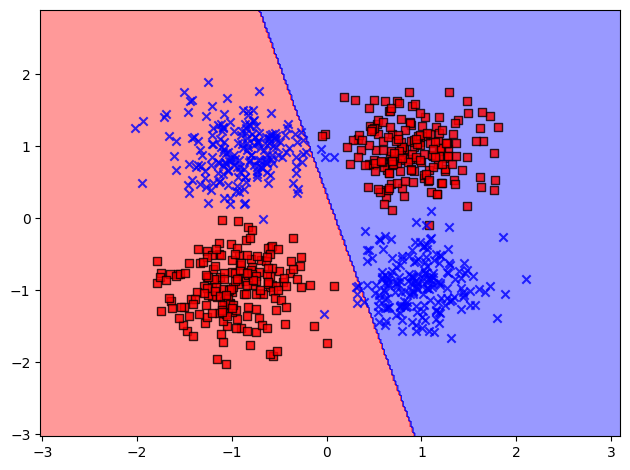

In [12]:
plot_decision_regions(features, targets, classifier=model1)

plt.tight_layout()
#plt.savefig('xor1.pdf')
plt.show()

<br>
<br>

## Multilayer Perceptron with Non-Linear Activations (Here: ReLU)

In [13]:
class MLPReLU(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1, num_classes):
        super().__init__()
        
        self.num_classes = num_classes
        
        self.hidden = nn.Linear(num_features, num_hidden_1)
        self.out = nn.Linear(num_hidden_1, num_classes)
        
    def forward(self, x):
        
        hidden_out = self.hidden(x)
        hidden_act = F.relu(hidden_out) # this time we add the non-linearity
        
        logits = self.out(hidden_act)
        probas = F.softmax(logits, dim=1) 
        return logits, probas

In [14]:
torch.manual_seed(RANDOM_SEED)

model2 = MLPReLU(num_features=2,
                num_hidden_1=50,
                num_classes=2)

optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

In [15]:
start_time = time.time()
costs = []

NUM_EPOCHS = 25

features = torch.tensor(X, dtype=torch.float)
targets = torch.tensor(y, dtype=torch.long)

for epoch in range(NUM_EPOCHS):

    ### FORWARD PASS AND BACK PROP
    logits, probas = model2(features)

    loss = F.cross_entropy(logits, targets)
    costs.append(loss.item())
    
    optimizer.zero_grad()

    loss.backward()
    
    optimizer.step()

    ### LOGGING

    print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | Cost: {loss:.4f}')

    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/025 | Cost: 0.7163
Epoch: 002/025 | Cost: 0.6874
Epoch: 003/025 | Cost: 0.6631
Epoch: 004/025 | Cost: 0.6412
Epoch: 005/025 | Cost: 0.6210
Epoch: 006/025 | Cost: 0.6019
Epoch: 007/025 | Cost: 0.5838
Epoch: 008/025 | Cost: 0.5665
Epoch: 009/025 | Cost: 0.5501
Epoch: 010/025 | Cost: 0.5344
Epoch: 011/025 | Cost: 0.5193
Epoch: 012/025 | Cost: 0.5049
Epoch: 013/025 | Cost: 0.4910
Epoch: 014/025 | Cost: 0.4777
Epoch: 015/025 | Cost: 0.4649
Epoch: 016/025 | Cost: 0.4525
Epoch: 017/025 | Cost: 0.4406
Epoch: 018/025 | Cost: 0.4291
Epoch: 019/025 | Cost: 0.4181
Epoch: 020/025 | Cost: 0.4074
Epoch: 021/025 | Cost: 0.3971
Epoch: 022/025 | Cost: 0.3872
Epoch: 023/025 | Cost: 0.3776
Epoch: 024/025 | Cost: 0.3684
Epoch: 025/025 | Cost: 0.3594
Total Training Time: 0.00 min


/var/folders/rr/hpxw9wtn1hvdyxlkzvlbl2hr0000gn/T/ipykernel_87325/44765250.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


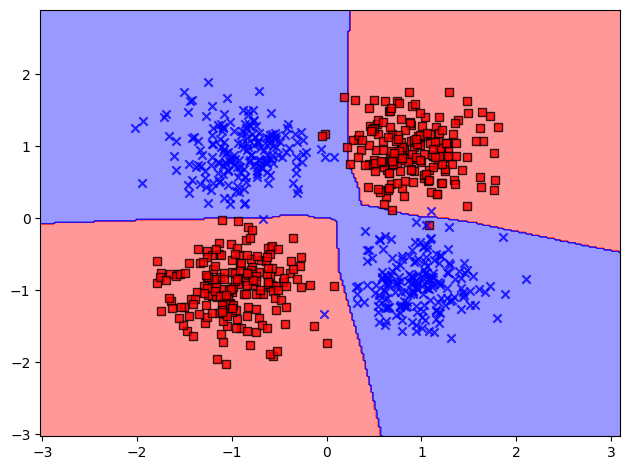

In [16]:
plot_decision_regions(features, targets, classifier=model2)

plt.tight_layout()
#plt.savefig('xor2.pdf')
plt.show()